<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Dic/Tarea_01/Red_Neuronal_01_12_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Cargar datos
data = pd.read_csv('/content/drive/MyDrive/Machine-Learning-2023/train.csv')

In [6]:
# Preprocesamiento de datos
labels = data.label
images = data.drop(['label'], axis=1).to_numpy()
images = images / 255  # Normalizar los datos

# Dividir en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.10, random_state=42)

def convert_to_one_hot(Y):
    ones = np.zeros((Y.size, 10))
    ones[np.arange(Y.size), Y] = 1
    return ones

y_train_one_hot = convert_to_one_hot(y_train)
y_test_one_hot = convert_to_one_hot(y_test)

# Función para visualizar el rendimiento del modelo
def plot_history(history, title):
    plt.plot(history.history['loss'], color='black')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

Epoch 1/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.4148 - accuracy: 0.1677
Epoch 2/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.3159 - accuracy: 0.2135
Epoch 3/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.3061 - accuracy: 0.2384
Epoch 4/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.2997 - accuracy: 0.2595
Epoch 5/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2950 - accuracy: 0.2774
Epoch 6/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2912 - accuracy: 0.2921
Epoch 7/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2879 - accuracy: 0.2982
Epoch 8/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2850 - accuracy: 0.3001
Epoch 9/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2823 - accuracy: 0.3051
Epoch 10/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.280

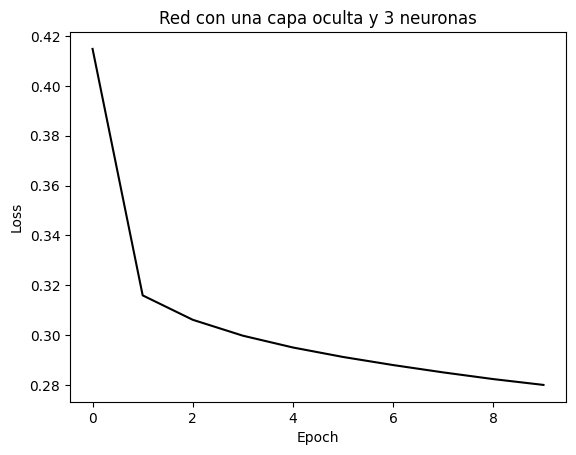

In [7]:
# Modelo 1: Una capa oculta con 3 neuronas
model1 = Sequential([
    tf.keras.Input(shape=(x_train.shape[1],)),
    Dense(3, activation='relu', name='layer1'),
    Dense(10, activation='softmax')
])

model1.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history1 = model1.fit(x_train, y_train_one_hot, epochs=10)
plot_history(history1, 'Red con una capa oculta y 3 neuronas')

Epoch 1/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.3636 - accuracy: 0.1955
Epoch 2/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2822 - accuracy: 0.4140
Epoch 3/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2389 - accuracy: 0.5972
Epoch 4/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2012 - accuracy: 0.6801
Epoch 5/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1738 - accuracy: 0.7363
Epoch 6/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1540 - accuracy: 0.7740
Epoch 7/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1392 - accuracy: 0.8021
Epoch 8/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1278 - accuracy: 0.8217
Epoch 9/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1188 - accuracy: 0.8369
Epoch 10/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.111

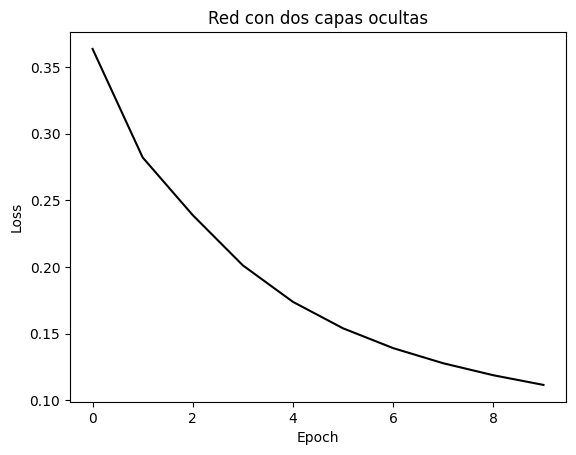

In [8]:
# Modelo 2
model2 = Sequential([
    tf.keras.Input(shape=(x_train.shape[1],)),
    Dense(16, activation='relu', name='layer1'),
    Dense(16, activation='relu', name='layer2'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history2 = model2.fit(x_train, y_train_one_hot, epochs=10)
plot_history(history2, 'Red con dos capas ocultas')

Epoch 1/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.3713 - accuracy: 0.2396
Epoch 2/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.2893 - accuracy: 0.5078
Epoch 3/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.2481 - accuracy: 0.6320
Epoch 4/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2093 - accuracy: 0.7140
Epoch 5/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1767 - accuracy: 0.7685
Epoch 6/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1523 - accuracy: 0.8010
Epoch 7/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.1346 - accuracy: 0.8247
Epoch 8/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1215 - accuracy: 0.8405
Epoch 9/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1118 - accuracy: 0.8529
Epoch 10/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.104

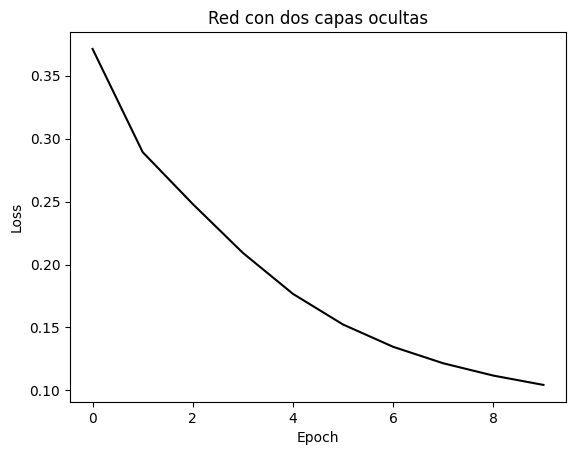

In [9]:
# Modelo 3
model3 = Sequential([
    tf.keras.Input(shape=(x_train.shape[1],)),
    Dense(32, activation='relu', name='layer1'),
    Dense(16, activation='relu', name='layer2'),
    Dense(10, activation='softmax')
])

model3.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history3 = model3.fit(x_train, y_train_one_hot, epochs=10)
plot_history(history3, 'Red con dos capas ocultas')

Epoch 1/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.3775 - accuracy: 0.1912
Epoch 2/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2828 - accuracy: 0.3992
Epoch 3/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.2431 - accuracy: 0.5711
Epoch 4/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.2074 - accuracy: 0.6735
Epoch 5/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1718 - accuracy: 0.7514
Epoch 6/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1405 - accuracy: 0.7963
Epoch 7/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1201 - accuracy: 0.8233
Epoch 8/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1072 - accuracy: 0.8412
Epoch 9/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0984 - accuracy: 0.8541
Epoch 10/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.091

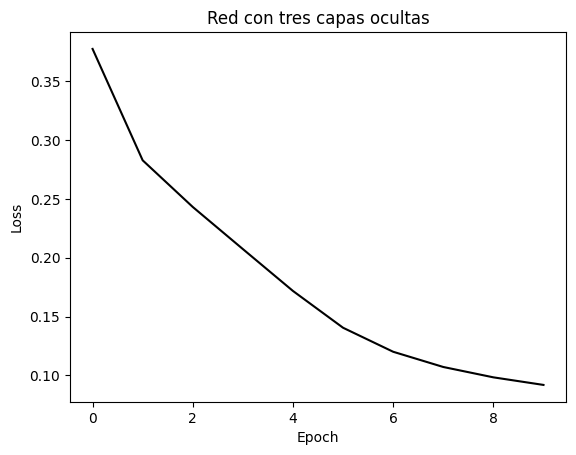

In [10]:
# Modelo 4
model4 = Sequential([
    tf.keras.Input(shape=(x_train.shape[1],)),
    Dense(32, activation='relu', name='layer1'),
    Dense(32, activation='relu', name='layer2'),
    Dense(32, activation='relu', name='layer3'),
    Dense(10, activation='softmax')
])

model4.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history4 = model4.fit(x_train, y_train_one_hot, epochs=10)
plot_history(history4, 'Red con tres capas ocultas')

Epoch 1/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.3285 - accuracy: 0.3871
Epoch 2/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.2319 - accuracy: 0.7151
Epoch 3/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1738 - accuracy: 0.7995
Epoch 4/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.1400 - accuracy: 0.8343
Epoch 5/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1197 - accuracy: 0.8540
Epoch 6/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1064 - accuracy: 0.8677
Epoch 7/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0969 - accuracy: 0.8777
Epoch 8/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0899 - accuracy: 0.8843
Epoch 9/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0844 - accuracy: 0.8906
Epoch 10/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.079

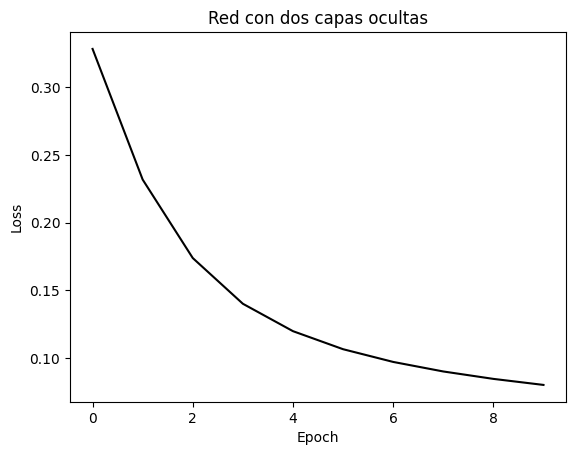

132/132 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.3131
Modelo 1: Costo = 0.27893009781837463, Exactitud = 0.31309524178504944
132/132 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.8488
Modelo 2: Costo = 0.11011195182800293, Exactitud = 0.848809540271759
132/132 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.8643
Modelo 3: Costo = 0.10270936787128448, Exactitud = 0.8642857074737549
132/132 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.8671
Modelo 4: Costo = 0.08974085748195648, Exactitud = 0.8671428561210632
132/132 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.8921
Modelo 5: Costo = 0.07941951602697372, Exactitud = 0.8921428322792053


In [11]:
# Modelo 5
model5 = Sequential([
    tf.keras.Input(shape=(x_train.shape[1],)),
    Dense(128, activation='relu', name='layer1'),
    Dense(128, activation='relu', name='layer2'),
    Dense(10, activation='softmax')
])

model5.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history5 = model5.fit(x_train, y_train_one_hot, epochs=10)
plot_history(history5, 'Red con dos capas ocultas')

# Evaluar todos los modelos en el conjunto de prueba
models = [model1, model2, model3, model4, model5]
for i, model in enumerate(models, start=1):
    cost, accuracy = model.evaluate(x_test, y_test_one_hot)
    print(f'Modelo {i}: Costo = {cost}, Exactitud = {accuracy}')
